###### FOUNDATION OF MACHINE LEARNING
### Practical Lab 
# **#9**
---

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix

### Data Analysis

In [8]:
from tensorflow.keras.datasets import fashion_mnist

# Load data to numpy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
# All expected output classes
all_labels = np.unique(train_labels)
print(f"Target labels: {all_labels}")

# Dimensions of training set
num_samples, num_rows, num_cols = train_images.shape
print(f"No. of samples: {num_samples}")
print(f"No. of rows per each sample {num_rows}")
print(f"No. of columns per each row {num_cols}")
print(f"Value range: {train_images.min()} - {train_images.max()}")

Target labels: [0 1 2 3 4 5 6 7 8 9]
No. of samples: 60000
No. of rows per each sample 28
No. of columns per each row 28
Value range: 0 - 255


From above, we can see that the expected target values ranges from 0 - 9 each representing unique class of clothing.
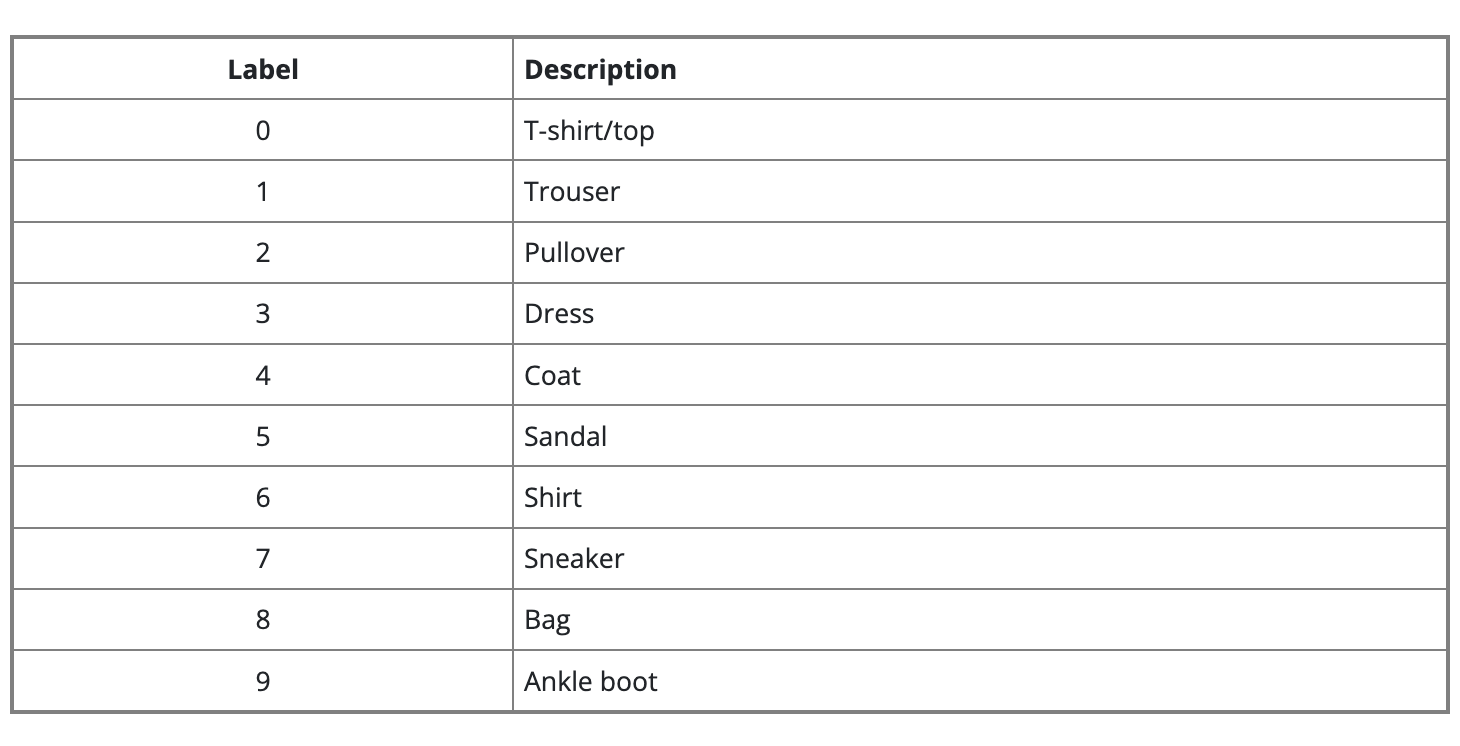

In [35]:
# Function accepts an index and plots the training sample at given index.
def plot_train_image_at(index):
    print(f"Image for train sample: {index}")
    print(f"Image target: {train_labels[index]}")
    plt.imshow(train_images[index].reshape(28, 28), cmap="gray")


# Function accepts an index and plots the testing sample at given index.
def plot_test_image_at(index):
    print(f"Image for train sample: {index}")
    print(f"Image target: {test_labels[index]}")
    plt.imshow(test_images[index].reshape(28, 28), cmap="gray")

Image for train sample: 0
Image target: 9


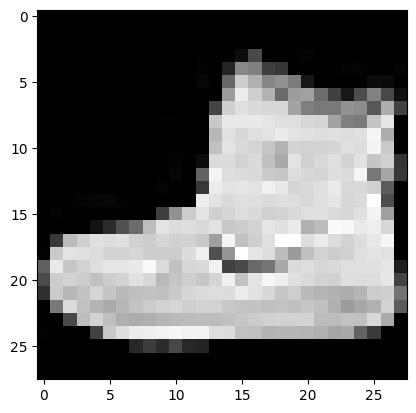

In [27]:
plot_train_image_at(0)  # Plot sample at index 0

From the above image, we can identify that the image sample at index 0 belongs to target class 9 (Ankle Boot).

### Training

In [29]:
# Reshape matrix from (6000, 28, 28) to (6000, 784) for training.
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalizing the values to the range [0,1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255


model = keras.Sequential(
    [
        # 128 nodes with the first neuron layer with relu activation function
        keras.layers.Dense(128, activation="relu"),
        # 10 nodes, equal to total number of expected ouput classes, with the second neuron layer with softmax activation function
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=5, batch_size=128)

2023-07-21 22:13:10.771378: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-21 22:13:10.771735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-07-21 22:13:11.736498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 7ms/step - loss: 0.6273 - accuracy: 0.7814
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4920 - accuracy: 0.8278
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4661 - accuracy: 0.8368
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4550 - accuracy: 0.8409
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4459 - accuracy: 0.8435


### Prediction

In [34]:
prediction = model.predict(test_images[3:4])

# Find max value in prediction to find target with maximum probability
prediction.argmax()

2023-07-21 22:22:50.394786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 358ms/step


1

Image for train sample: 3
Image target: 1


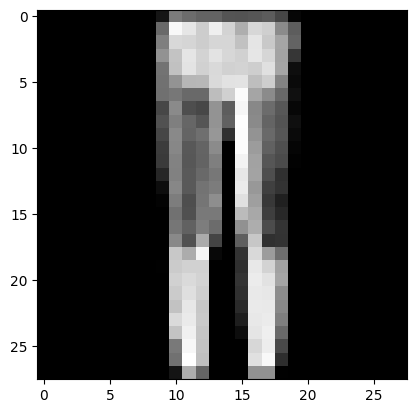

In [36]:
# Plot real sample to compare
plot_test_image_at(3)

From above results, we can see that model predicted correct target label 1 (Trouser) for test sample at index 3.

### Evaluation

In [37]:
# Find overall accuracy of the model.
loss, accuracy = model.evaluate(test_images, test_labels)
print("Accuracy:", accuracy)

 20/313 [>.............................] - ETA: 1s - loss: 0.4716 - accuracy: 0.8313

2023-07-21 22:27:10.035013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.4986 - accuracy: 0.8245
Accuracy: 0.8245000243186951


In [40]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find confusion matrix
confusion_matrix(test_labels, predicted_labels)

313/313 [==============================] - 1s 2ms/step


array([[836,   3,  10,  53,   3,   0,  79,   0,  16,   0],
       [  3, 957,   3,  27,   2,   0,   7,   0,   1,   0],
       [ 26,   3, 747,  13,  41,   0, 161,   0,   9,   0],
       [ 32,  12,  11, 889,   9,   0,  43,   0,   4,   0],
       [  0,   2, 203,  66, 479,   0, 239,   0,  11,   0],
       [  0,   0,   0,   1,   0, 872,   0,  75,  14,  38],
       [178,   3,  99,  35,  35,   1, 626,   0,  23,   0],
       [  0,   0,   0,   0,   0,  18,   0, 971,   0,  11],
       [  4,   1,   2,  10,   1,   1,  22,   6, 953,   0],
       [  0,   0,   0,   0,   0,   2,   1,  80,   2, 915]])

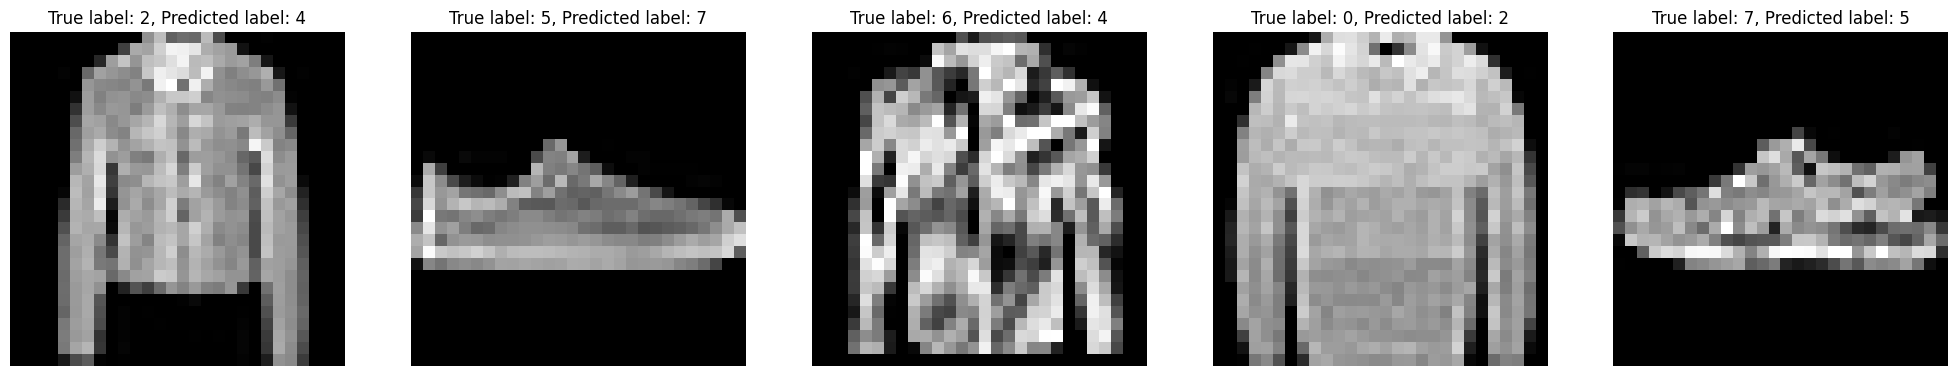

In [44]:
misclassified_indices = np.where(predicted_labels != test_labels)[0]
plt.figure(figsize=(25, 8))

# plot the first 5 misclassified examples
for i, index in enumerate(misclassified_indices[0:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap="gray")
    plt.title(
        f"True label: {predicted_labels[index]}, Predicted label: {test_labels[index]}"
    )
    plt.axis("off")
plt.show()

From the above sample data, we can see the in cases where the model predicted wrong target labels, most of the time the sample images were vaguely similar to samples in predicted classes. Coat <-> Pullover, Sandal <-> Sneaker are visually similar categories and these images are not distinguishable enough to determine the exact category.